#### CUSTOMER CHURN PREDICTION USING DECISION TREE CLASSIFICATION MODEL

###### OBJECTIVE: USING DECISION TREE TO PREDICT WHETHER CUSTOMERS WILL TERMINATE THEIR CONTRACT OR NOT.
##### I will test out which parameters that should be tuned to achieve the best model performance.


In [3]:
# IMPORT LIBRARIES
import pandas as pd # Library for data manipulation and analysis 
import numpy as np # Library for scientific computing 
import scipy as sp # library for scientific and technical computing
import matplotlib  # Library for plotting
import matplotlib.pyplot as plt # matplotlib plotting framework.
import seaborn as sns  # Python data visualization library based on matplotlib #
from sklearn import tree # Imports the tree module from the scikit-learn library
from sklearn.model_selection import train_test_split # train_ test_split function splits data into testing and training datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score # This helps us check the decision tree performance.
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [4]:
# IMPORT DATA
data = pd.read_csv ("C:\\Users\\14257\\Downloads\\HW1_Data.csv")
data

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.00,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.00,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.00,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.00,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.00,27,224,1,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31886,185.30,178.67,171.00,41,44,1,1,0,1,1,0,0
31887,167.59,141.33,283.67,17,28,1,0,0,0,0,0,0
31888,151.49,128.67,175.33,47,9,1,1,0,0,1,0,0
31889,125.42,90.00,336.67,18,79,1,0,0,0,0,0,0


##### 1. DATA EXPLORATION

In [6]:

#Are there any null values
data.isna().sum()

revenue     0
outcalls    0
incalls     0
months      0
eqpdays     0
webcap      0
marryyes    0
travel      0
pcown       0
creditcd    0
retcalls    0
churndep    0
dtype: int64

There are no null values in any of the columns

In [8]:
# What the datatypes for each column?
data.dtypes

revenue     float64
outcalls    float64
incalls     float64
months        int64
eqpdays       int64
webcap        int64
marryyes      int64
travel        int64
pcown         int64
creditcd      int64
retcalls      int64
churndep      int64
dtype: object

 All features in our dataset are integer or float datatypes. We do not need to encode any column.

In [10]:
#Print summary statistics 
data.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### DATA VISUALIZATION

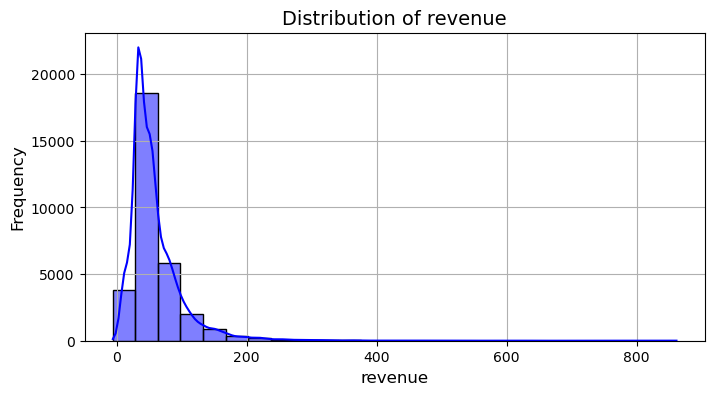

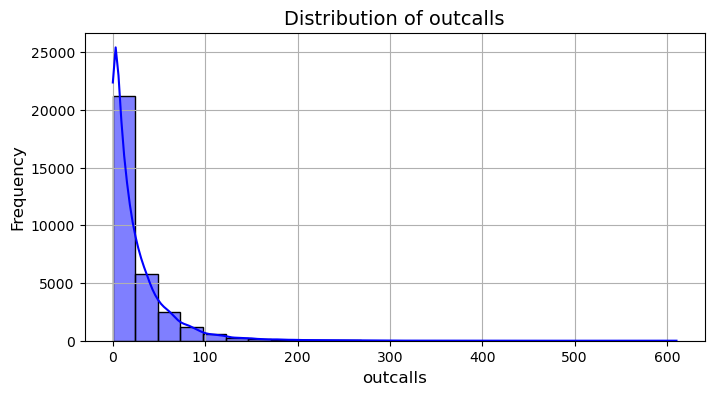

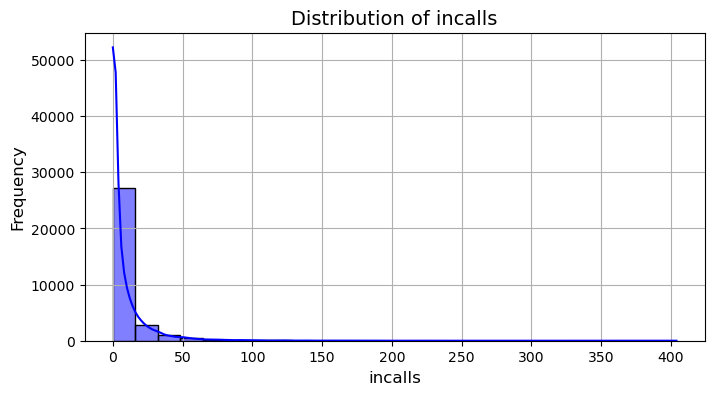

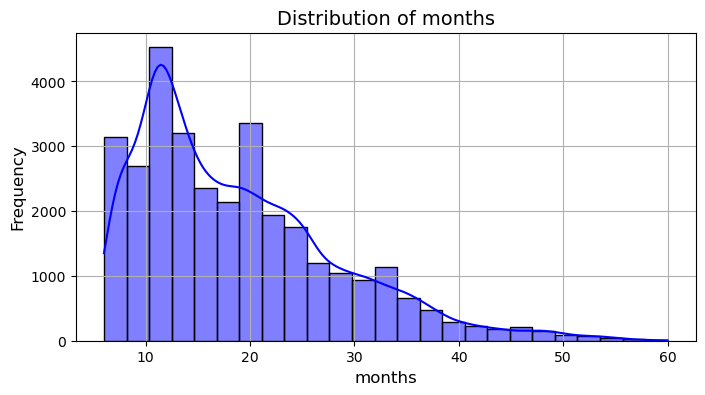

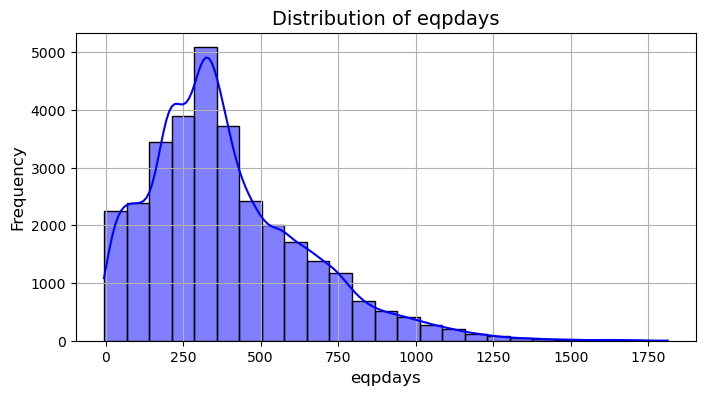

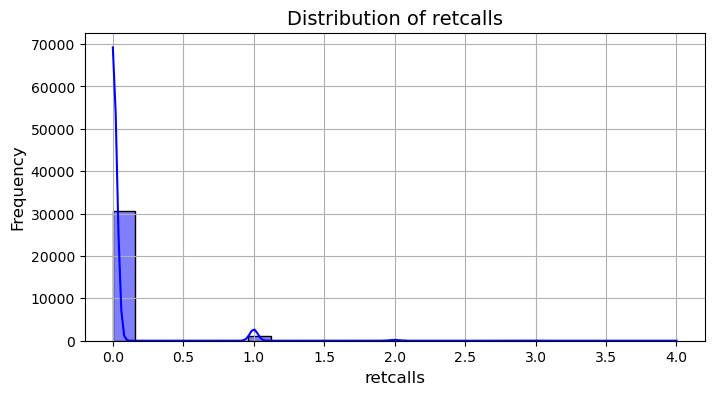

In [17]:
# Plot histograms to visualize distributions for revenue, outcalls, incalls,eqpdays,retcalls and months columns

columns = ['revenue', 'outcalls', 'incalls','months','eqpdays','retcalls']

for col in columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True, bins=25, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()






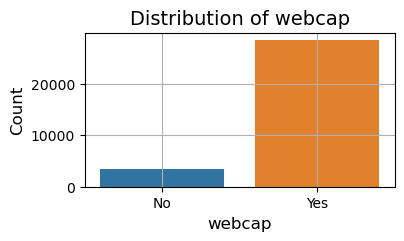

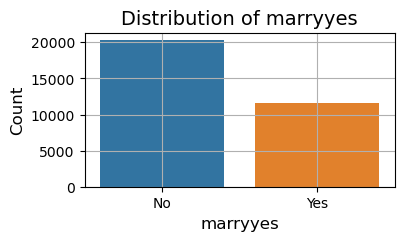

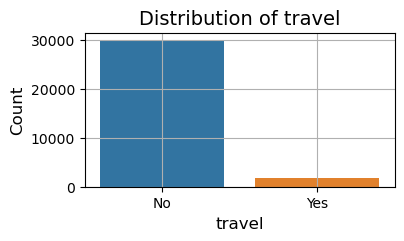

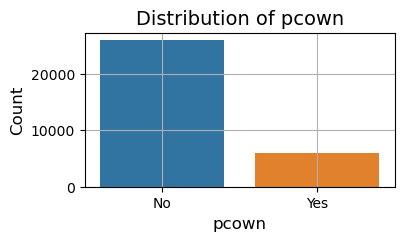

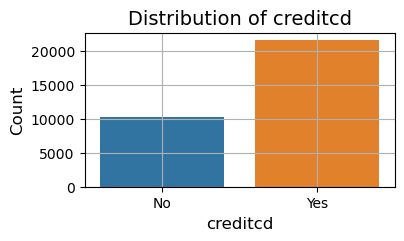

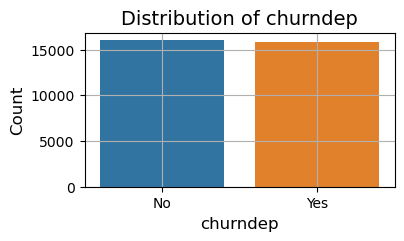

In [18]:
# Plot histograms to visualize binary columns

boolean_columns = ['webcap', 'marryyes', 'travel', 'pcown', 
                   'creditcd', 'churndep']

# plot each column individually 
for col in boolean_columns:
    plt.figure(figsize=(4,2))
    sns.countplot(x=data[col], hue=data[col], legend=False)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks([0, 1], labels=['No', 'Yes'])  # Optional: Label the categories
    plt.grid(True)
    plt.show()

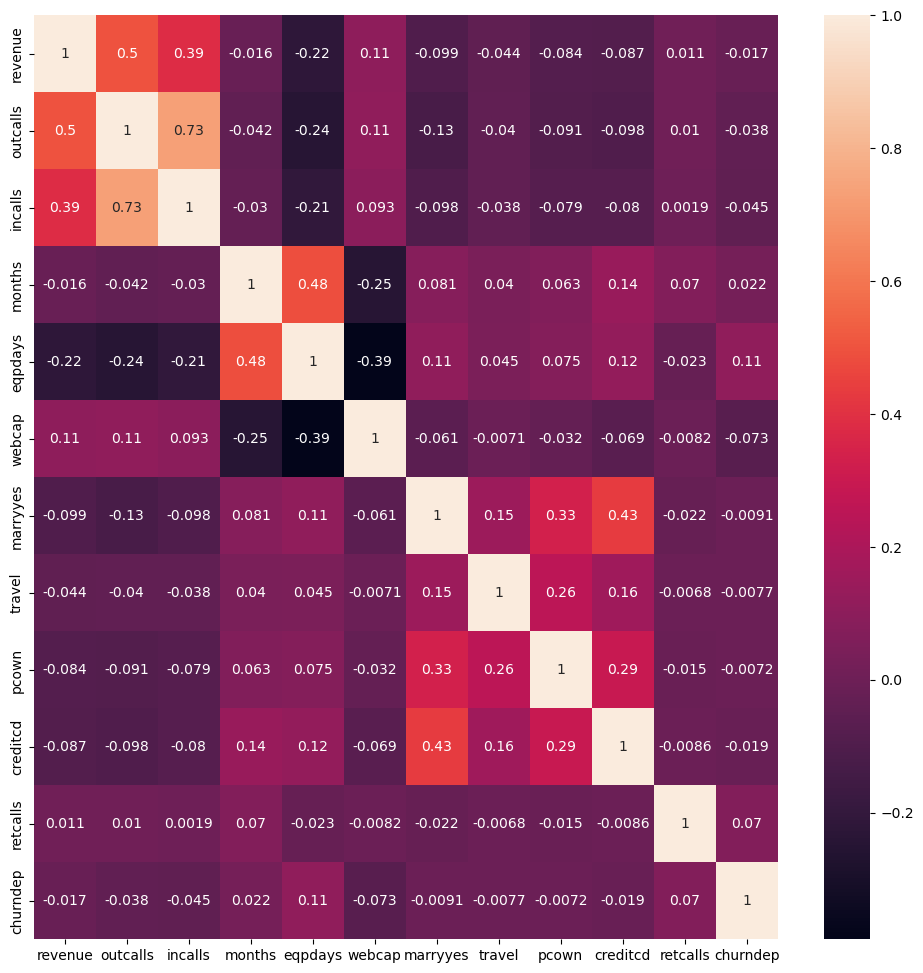

In [19]:
# Correlation matrix between features
import seaborn as sns 
corrmatrix=data.corr()
top_correlated_features = corrmatrix.index
plt.figure(figsize=(12,12))

# Plot a heatmap
plot=sns.heatmap(data[top_correlated_features].corr(),annot=True)


The churn dep column has evenly distributed "1" and "0" values.

#### 2. MODELING

In [22]:
# Retrive model features 
X = data.drop(columns=["churndep"])
# Retrive Model target variable
y = data ["churndep"]


In [23]:
# Checking the exact value counts of churners and non churners in the dataset
churndep_count = data['churndep'].value_counts()
print( f"There are {churndep_count[1]} churners and {churndep_count[0]} non churners in churndep column. classes in the target column are fairly balanced")

There are 15855 churners and 16036 non churners in churndep column. classes in the target column are fairly balanced


In [24]:
# SPLITTING THE DATASET FOR MODEL TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # The data is split in a way that we keep 75% of the data for training and 25% for testing 

After properly splitting the data we can finally start modeling and testing out which parameters should be tuned to improve model performance. In order to compare different models we will look at Accuracy of the test set as a benchmark.

In [26]:
# Trying various max_leaf node values:
for i in range (2,50,1):
    clf1 = DecisionTreeClassifier(criterion ='entropy', splitter ='best', max_depth=None, max_leaf_nodes=i)
    clf1 = clf1.fit(X_train, y_train)
    y_pred1 = clf1.predict(X_test)
    rate = accuracy_score(y_test,y_pred1)
    print(str(i)+" "+str(rate))

2 0.5894895271541453
3 0.5894895271541453
4 0.6014047410008779
5 0.6014047410008779
6 0.6051674401103725
7 0.6051674401103725
8 0.6051674401103725
9 0.6051674401103725
10 0.6036623604665747
11 0.6024081274300765
12 0.6024081274300765
13 0.6024081274300765
14 0.6024081274300765
15 0.6024081274300765
16 0.6024081274300765
17 0.602784397341026
18 0.6035369371629249
19 0.5973911952840838
20 0.5973911952840838
21 0.5973911952840838
22 0.5973911952840838
23 0.5973911952840838
24 0.5973911952840838
25 0.5962623855512355
26 0.5956352690329864
27 0.5956352690329864
28 0.5956352690329864
29 0.5956352690329864
30 0.5956352690329864
31 0.5956352690329864
32 0.5956352690329864
33 0.5967640787658347
34 0.5970149253731343
35 0.597265771980434
36 0.5990216982315314
37 0.5990216982315314
38 0.5990216982315314
39 0.6001505079643797
40 0.5993979681424809
41 0.5993979681424809
42 0.5993979681424809
43 0.5993979681424809
44 0.5996488147497805
45 0.5990216982315314
46 0.5991471215351812
47 0.599147121535181

In [27]:
# Trying various min_impurity decrease values:
import numpy as np
for i in np.arange(0, 0.011, 0.001):
    clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_impurity_decrease=i)
    clf2 = clf2.fit(X_train, y_train)
    y_pred2 = clf2.predict(X_test)
    rate = accuracy_score(y_test,y_pred2)
    print(str(i)+" "+str(rate))
    

0.0 0.5311676909569798
0.001 0.6051674401103725
0.002 0.6014047410008779
0.003 0.6014047410008779
0.004 0.6014047410008779
0.005 0.5894895271541453
0.006 0.5894895271541453
0.007 0.5894895271541453
0.008 0.5894895271541453
0.009000000000000001 0.5894895271541453
0.01 0.5894895271541453


By evaluating these models across different parameters in a For-loop we are able to identify where the maximum gain in accuracy occurs. Which happens to be at a max_leaf_nodes of 14, and a min_impurity_decrease of .001

In [30]:
# Best max leaf and min impurity parameters
clf_best = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=14, min_impurity_decrease=0.001)
clf_best = clf_best.fit(X_train, y_train)
y_pred3 = clf_best.predict(X_test)

[Text(0.45454545454545453, 0.9, 'eqpdays <= 304.5\nentropy = 1.0\nsamples = 31891\nvalue = [16036.0, 15855.0]\nclass = No Churn'),
 Text(0.18181818181818182, 0.7, 'months <= 10.5\nentropy = 0.968\nsamples = 12996\nvalue = [7870, 5126]\nclass = No Churn'),
 Text(0.09090909090909091, 0.5, 'entropy = 0.905\nsamples = 5505\nvalue = [3742.0, 1763.0]\nclass = No Churn'),
 Text(0.2727272727272727, 0.5, 'months <= 14.5\nentropy = 0.992\nsamples = 7491\nvalue = [4128, 3363]\nclass = No Churn'),
 Text(0.18181818181818182, 0.3, 'entropy = 0.982\nsamples = 2030\nvalue = [854, 1176]\nclass = Churn'),
 Text(0.36363636363636365, 0.3, 'retcalls <= 0.5\nentropy = 0.971\nsamples = 5461\nvalue = [3274, 2187]\nclass = No Churn'),
 Text(0.2727272727272727, 0.1, 'entropy = 0.961\nsamples = 5057\nvalue = [3111, 1946]\nclass = No Churn'),
 Text(0.45454545454545453, 0.1, 'entropy = 0.973\nsamples = 404\nvalue = [163, 241]\nclass = Churn'),
 Text(0.7272727272727273, 0.7, 'months <= 12.5\nentropy = 0.987\nsample

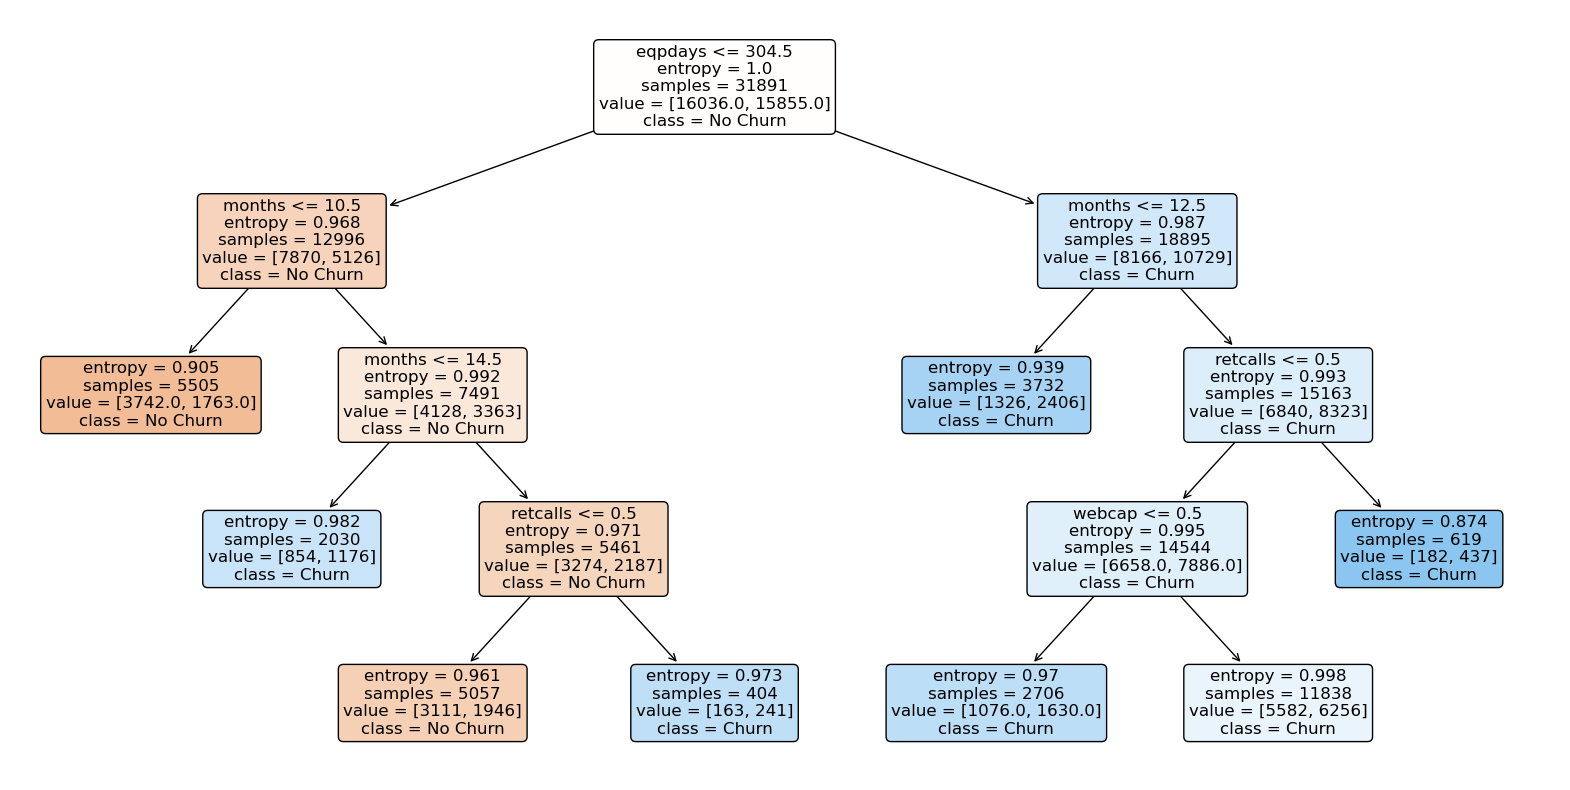

In [31]:
# Plot the decision tree with the best parameters.
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))  # initializes a new figure with a 10x10 inch size

# Visualizing the Tree
tree.plot_tree(
    clf_best.fit(X, y),
    feature_names=data.drop(columns=["churndep"]).columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=12
)


Confusion matrix, without normalization
[[1710 2230]
 [ 918 3115]]
Normalized confusion matrix
[[0.43 0.57]
 [0.23 0.77]]


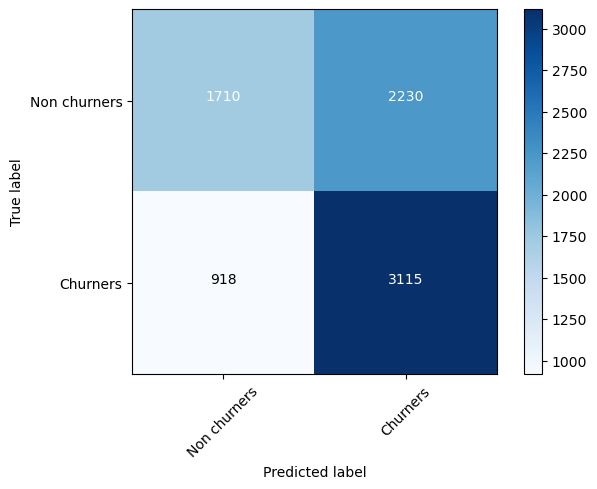

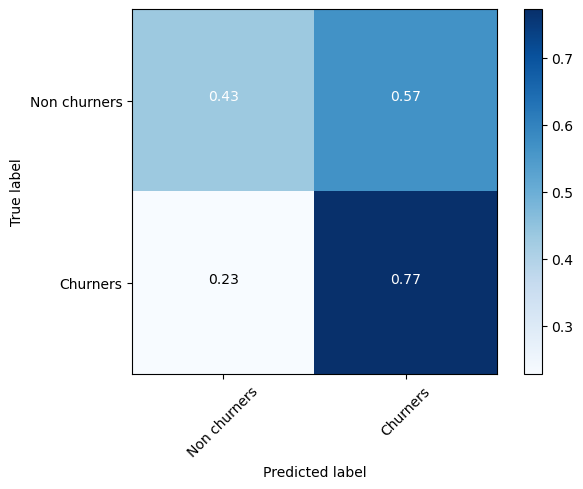

In [38]:
#Print confusion matrix for the best model
from sklearn.metrics import confusion_matrix         
import itertools                                       
from sklearn.model_selection import train_test_split

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)         
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt),                              
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix to evaluate the accuracy of a classification
cnf_matrix = confusion_matrix(y_test, y_pred3)
np.set_printoptions(precision=2)                              

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['Non churners','Churners'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['Non churners','Churners'],
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [48]:
# Print performance scores 
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

# Print scores
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.61
Precision: 0.58
Recall: 0.77
F1-score: 0.66


##### Insights
* Accuracy (0.61): The model correctly classifies 61% of instances overall. While this accuracy is better than random guessing, it’s relatively low, indicating that the model might struggle to consistently make accurate predictions across both classes.

* Precision (0.58): The precision score of 0.58 suggests that when the model predicts "Churners," it’s correct only 58% of the time. This could indicate a high number of false positives (incorrectly labeling "Non churners" as "Churners"). This may be a concern if the cost of falsely predicting churn is high, such as wasting resources on retaining customers who aren't likely to churn.

* Recall (0.77): The model has a relatively high recall of 0.77, meaning it successfully captures 77% of actual "Churners." This shows that the model is good at identifying most of the true "Churners," which is often a priority when you want to take actions like retention efforts. However, this comes at the expense of precision, meaning some customers labeled as churners may not actually churn.

* F1-Score (0.66): The F1-score, a balance between precision and recall, is 0.66. This score is moderately high and suggests a trade-off between recall (finding as many churners as possible) and precision (reducing false positives). Given that recall is higher than precision, the F1-score reflects that the model may favor capturing more potential churners even at the risk of misclassifying some non-churners.

##### Recommendations

* Explore additional features to see if a higher overall accuracy and balanced precision-recall can be achieved.
* Further tune the parameters using grid search to improve performance.

